# Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

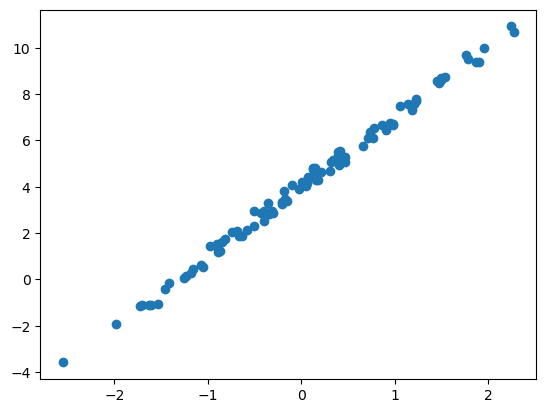

In [2]:
# Generate synthetic data
np.random.seed(0)
X = np.random.randn(100,1)
y = 4 + 3*X + np.random.randn(100,1)*0.2
plt.scatter(X,y);

In [3]:
# Train a linear regression model
RG = LinearRegression()
RG.fit(X,y)

LinearRegression()

In [4]:
# Make predictions
X_test = np.array([[-2],[5], [0.5]])
y_pred = RG.predict(X_test)

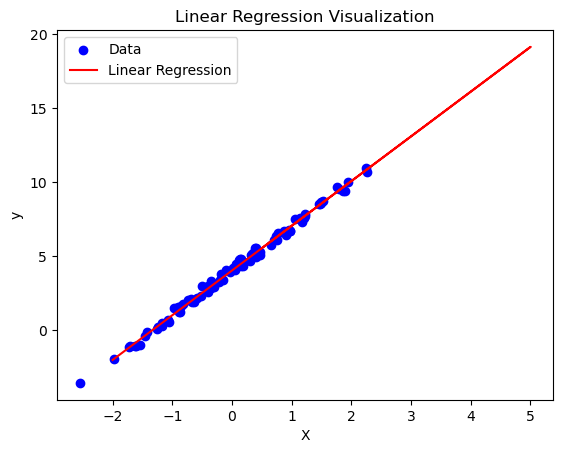

In [5]:
# Visualize the data and linear regression line
plt.scatter(X, y, label='Data', color='b')
plt.plot(X_test, y_pred, label='Linear Regression', color='r')
plt.xlabel('X')
plt.ylabel('y')
#plt.xlim([0,5])
#plt.ylim([0,5])
plt.title('Linear Regression Visualization')
plt.legend()
plt.show()

In [6]:
RG.coef_

array([[3.02293969]])

In [7]:
RG.intercept_

array([4.01503062])

### y = 3.02293969*X + 4.01503062

# Gradient descent

In [8]:
data= np.array([[2.9000001 , 4],
       [6.69999981, 7.4000001 ],
       [4.9000001 , 5],
       [7.9000001 , 7.19999981],
       [9.80000019, 7.9000001 ],
       [6.9000001 , 6.0999999 ],
       [6.0999999 , 6],
       [6.19999981, 5.80000019],
       [6, 5.19999981],
       [5.0999999 , 4.19999981],
       [4.69999981, 4],
       [4.4000001 , 4.4000001 ],
       [5.80000019, 5.19999981]])
np.random.shuffle(data)

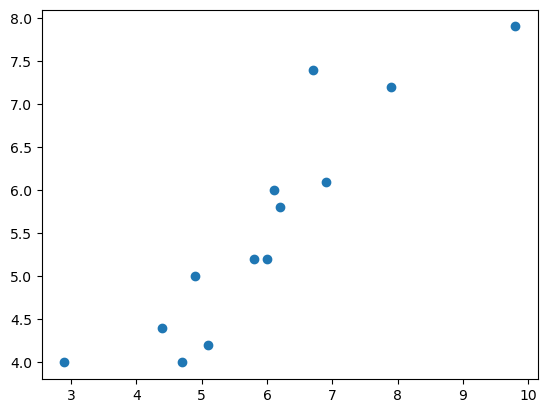

In [9]:
X = data[:, 0]
y = data[:, 1]
plt.scatter(X, y)
plt.show()

In [10]:
w, b = 0,0
lr = 0.01

In [11]:
y_pred = b+(w*X)
print(y_pred)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [12]:
e = (y_pred - y)
cost = (np.linalg.norm(e)**2) / (2 * X.shape[0])
e, cost

(array([-4.19999981, -5.        , -7.9000001 , -4.4000001 , -5.80000019,
        -6.0999999 , -4.        , -5.19999981, -6.        , -7.4000001 ,
        -4.        , -7.19999981, -5.19999981]),
 16.30538448615385)

In [13]:
grad_b = np.sum(y_pred - y) / X.shape[0]
grad_w = np.sum((y_pred - y) * X) / X.shape[0]
grad_b, grad_w


(-5.56923074076923, -35.043846056692296)

In [14]:
b= b - (lr * grad_b)
w = w - (lr * grad_w)
w, b

(0.35043846056692296, 0.0556923074076923)

In [15]:
w = 0
b = 0
lr = 0.01
j=[-1]
for i in range(10000):
    y_pred = b + (w * X)
    print(f"\n****************** Iteration {i} ********************\n")
    print(y_pred)
    e = (y_pred - y)
    print("Error vector:")
    print(e)
    j.append((np.linalg.norm(e)**2) / (2 * X.shape[0]))
    print("j=", end=" ")
    print(j[-1])
    grad_b = np.sum(y_pred - y) / X.shape[0]
    grad_w = np.sum((y_pred - y) * X) / X.shape[0]
    print("grad ",np.linalg.norm([[grad_b], [grad_w]]))
    if (np.linalg.norm([[grad_b], [grad_w]])) < 0.01 or (abs(j[-1]-j[-2]) < 0.0001):
        break
    w = w - (lr * grad_w)
    b = b - (lr * grad_b)


****************** Iteration 0 ********************

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Error vector:
[-4.19999981 -5.         -7.9000001  -4.4000001  -5.80000019 -6.0999999
 -4.         -5.19999981 -6.         -7.4000001  -4.         -7.19999981
 -5.19999981]
j= 16.30538448615385
grad  35.48362266580284

****************** Iteration 1 ********************

[1.84292842 1.7728408  3.48998929 1.59762157 2.2284107  2.47371772
 1.07196388 2.15832307 2.19336688 2.40362993 1.70275301 2.82415618
 2.08823545]
Error vector:
[-2.35707139 -3.2271592  -4.41001081 -2.80237853 -3.57158949 -3.62628218
 -2.92803612 -3.04167674 -3.80663312 -4.99637017 -2.29724699 -4.37584363
 -3.11176436]
j= 6.175608807605484
grad  21.61190528682407

****************** Iteration 2 ********************

[2.9654603  2.85269582 5.6154285  2.57078432 3.58566554 3.98034179
 1.72504984 3.47290105 3.52928329 3.86757703 2.73993106 4.54416478
 3.36013656]
Error vector:
[-1.23453951 -2.14730418 -2.2845716  -1.82921578 -2.

In [16]:
y_pred = b + (w * X)
y_pred

array([4.71361935, 4.53479095, 8.91609103, 4.08771953, 5.69717641,
       6.32307667, 2.74650524, 5.51834801, 5.6077622 , 6.14424783,
       4.35596212, 7.21721952, 5.3395196 ])

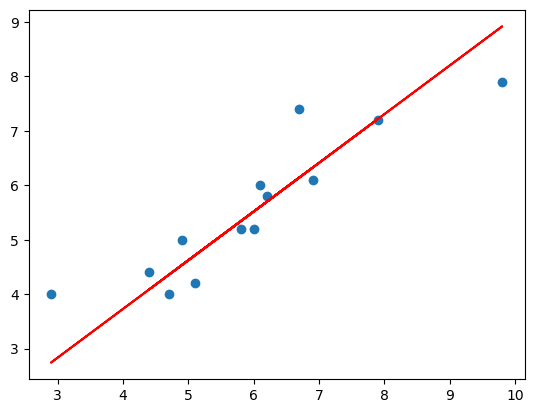

In [17]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='r')
plt.show()